# statistical analysis
+ This data is from the American Community Survey (ACS) compiled from 2014 to 2018
+ the first 3 columns include,
    1. **geoid** - serves as the primary key
    2. **county** - name of the county
    3. **st** - state name
+ the other columns are data for each county
    4. **pct_travel_60_min** - the percentage of workersages 16 and older who commute more than 60 minutes to work
    5. **pct_bachelors_higher** - the percentage of people ages 25 and older whose level of education is a bachelor's degree or higher
    6. **pct_masters_higher** - percentage of people ages 25 and older whose level of education is a master's degree or higher (a master's degree is the first advanced degree earned after completing a bachelor's degree)
    7. **median_hh_income** - the county's median household income
+ the main purpose of this project is to try understand the relationships that exist between variables, for example,
    * investigate the relationship between the percentage of people in a county who have attained a bachelor's degree and the median household income in that county
    * determine whether according to this data, a better educated population typically equates to higher income and how strong the relationship between education level and income is

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df=pd.read_csv('acs_2014_2018_stats.csv')
df.describe()

,pct_travel_60_min,pct_bachelors_higher,pct_masters_higher,median_hh_income
count,3141.000000,3142.000000,3142.000000,3141.000000
mean,7.865231,21.573641,7.567673,51583.175422
std,4.912492,9.433683,4.374014,13703.502202
min,0.000000,0.000000,0.000000,20188.000000
25%,4.380000,15.000000,4.802500,42480.000000
50%,6.590000,19.250000,6.210000,49888.000000
75%,10.040000,25.575000,9.047500,57611.000000
max,35.670000,78.530000,43.240000,136268.000000


# 

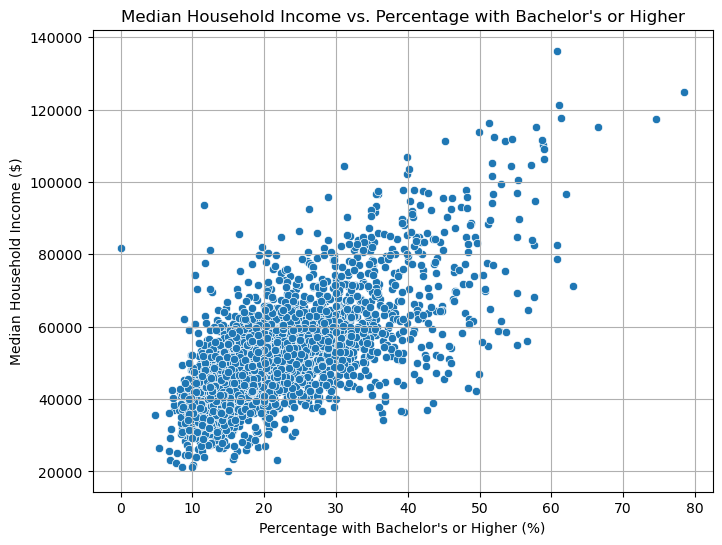

In [7]:
# Scatter plot: pct_bachelors_higher vs median_hh_income
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pct_bachelors_higher', y='median_hh_income', data=df)
plt.title('Median Household Income vs. Percentage with Bachelor\'s or Higher')
plt.xlabel('Percentage with Bachelor\'s or Higher (%)')
plt.ylabel('Median Household Income ($)')
plt.grid(True)
plt.show()

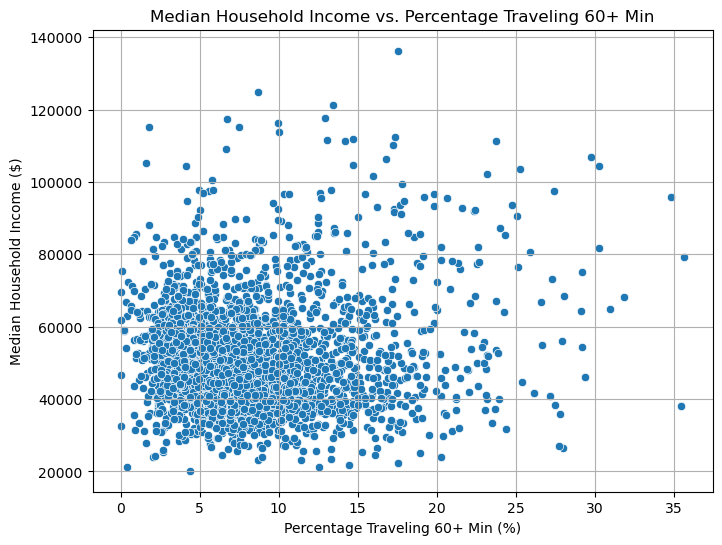

In [8]:
# Scatter plot: pct_travel_60_min vs median_hh_income
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pct_travel_60_min', y='median_hh_income', data=df)
plt.title('Median Household Income vs. Percentage Traveling 60+ Min')
plt.xlabel('Percentage Traveling 60+ Min (%)')
plt.ylabel('Median Household Income ($)')
plt.grid(True)
plt.show()


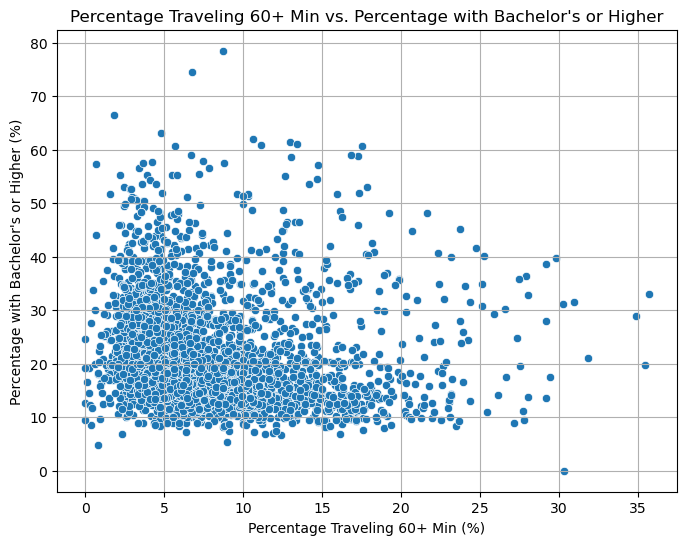

In [9]:
# Scatter plot: pct_travel_60_min vs pct_bachelors_higher
plt.figure(figsize=(8, 6))
sns.scatterplot(x='pct_travel_60_min', y='pct_bachelors_higher', data=df)
plt.title('Percentage Traveling 60+ Min vs. Percentage with Bachelor\'s or Higher')
plt.xlabel('Percentage Traveling 60+ Min (%)')
plt.ylabel('Percentage with Bachelor\'s or Higher (%)')
plt.grid(True)
plt.show()

In [17]:
# Extract the relevant columns
x = df['pct_bachelors_higher']  # Predictor (independent variable)
y = df['median_hh_income']      # Response (dependent variable)

# Check for NaN or infinite values and handle them
df = df.replace([np.inf, -np.inf], np.nan).dropna(subset=['pct_bachelors_higher', 'median_hh_income'])
# Calculate slope and intercept using numpy's polyfit function
slope, intercept = np.polyfit(x, y, 1)
# Print the slope and intercept
print(f"Regression Slope: {slope:.2f}")
print(f"Regression Intercept: {intercept:.2f}")

Regression Slope: 1016.55
Regression Intercept: 29651.42


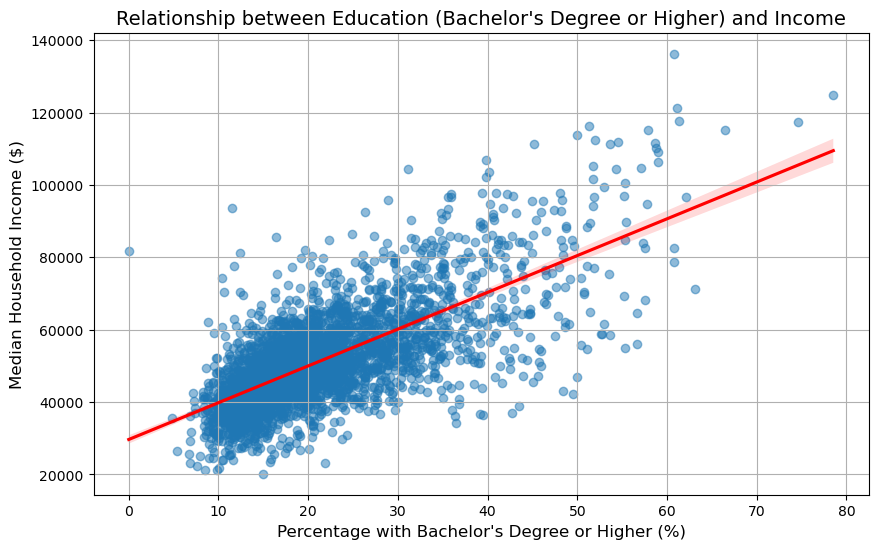

In [18]:
# Create the scatterplot with the regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='pct_bachelors_higher', y='median_hh_income', data=df, line_kws={"color":"red"}, scatter_kws={"alpha":0.5})

# Add title and labels
plt.title('Relationship between Education (Bachelor\'s Degree or Higher) and Income', fontsize=14)
plt.xlabel('Percentage with Bachelor\'s Degree or Higher (%)', fontsize=12)
plt.ylabel('Median Household Income ($)', fontsize=12)

# Show the plot
plt.grid(True)
plt.show()